## 『本次練習內容』
#### 計算 Bounding Box Regression Loss

## 『本次練習目的』
  #### 了解Proposal 與 標註框之間的轉換
  #### 這裡希望學員清楚理解我們要預測的不是實際的(x,y,w,h)，而是他們相對應的偏置量

In [2]:
import cv2
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##讀入照片
image=cv2.imread('Dog.JPG')

##因為CV2會將照片讀成BGR，要轉回來
image=image[:,:,::-1]

## 先設BBOX格式為[X,Y,W,H]
## 也就是左上角那一點的座標以及BBOX的寬和高

In [3]:
Ground_Truth_BBOX=[1900,700,1800,1800]
Region_Proposal=[1800,800,1500,1500]

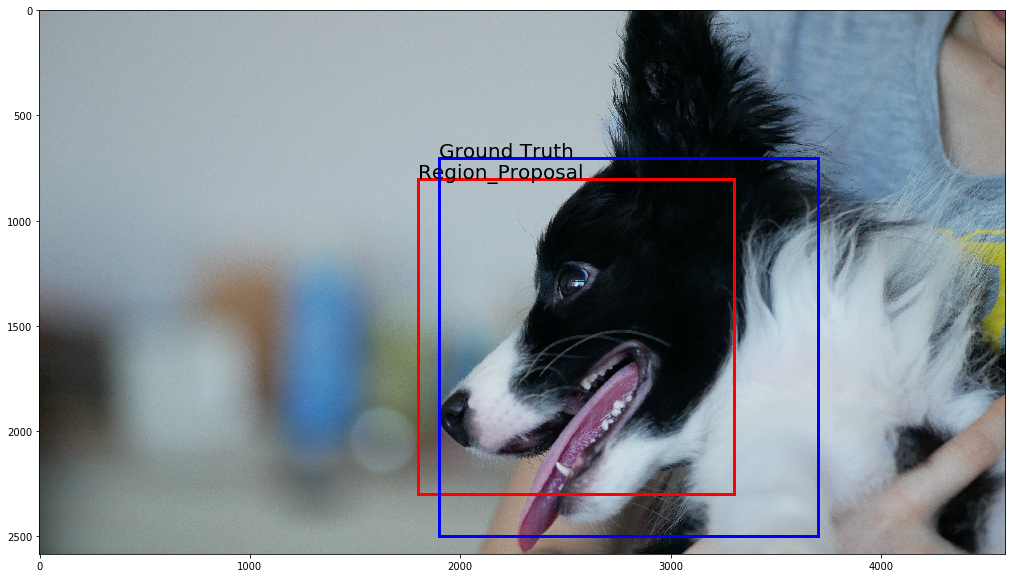

In [4]:
plt.rcParams['figure.figsize'] = (20, 10)


fig,ax = plt.subplots(1)

##畫出圖片
ax.imshow(image)

# 畫BBOX-Prediction
rect = patches.Rectangle((Region_Proposal[0],Region_Proposal[1]),Region_Proposal[2],Region_Proposal[3],linewidth=3,edgecolor='r',facecolor='none',)
ax.text(1800,800,'Region_Proposal',withdash=True,size=20)
# 畫BBOX-Ground_Truth
rect_1 = patches.Rectangle((Ground_Truth_BBOX[0],Ground_Truth_BBOX[1]),Ground_Truth_BBOX[2],Ground_Truth_BBOX[3],linewidth=3,edgecolor='b',facecolor='none')
ax.text(1900,700,'Ground Truth',withdash=True,size=20)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect_1)



plt.show()

## 計算ti，按照公式寫

In [5]:
tx=(Ground_Truth_BBOX[0]-Region_Proposal[0])/Region_Proposal[2]
ty=(Ground_Truth_BBOX[1]-Region_Proposal[1])/Region_Proposal[3]
tw=np.log(Ground_Truth_BBOX[2]/Region_Proposal[2])
th=np.log(Ground_Truth_BBOX[3]/Region_Proposal[3])

In [6]:
print('x偏移量： ',tx)
print('y偏移量： ',ty)
print('w縮放量： ',tw)
print('h縮放量： ',th)

x偏移量：  0.06666666666666667
y偏移量：  -0.06666666666666667
w縮放量：  0.1823215567939546
h縮放量：  0.1823215567939546


## 假設Predict值 dx,dy,dw,dh

In [8]:
dx,dy,dw,dh=[0.05,-0.05,0.12,0.17]

In [9]:
Loss=np.sum(np.square(np.array([tx,ty,tw,th])-np.array([dx,dy,dw,dh])))

In [10]:
print('Loss值：',Loss)

Loss值： 0.004591352758604312
